In [18]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader

In [19]:
x=torch.tensor([[0,0],[0,1],[1,0],[1,1]],dtype=torch.float32)
y=torch.tensor([0,1,1,0],dtype=torch.float32)

In [20]:
class XorModelRelu(nn.Module):
    def __init__(self):
        super(XorModelRelu,self).__init__()
        self.layer1=nn.Linear(2,2,bias=True)
        self.layer2=nn.Linear(2,1,bias=True)
        self.activation=nn.ReLU()
    def forward(self,x):
        x=self.layer1(x)
        x=self.activation(x)
        x=self.layer2(x)
        return x


In [21]:
class MyDataset(Dataset):
    def __init__(self,X,Y):
        self.x=X
        self.y=Y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, index):
        return self.x[index],self.y[index]

In [22]:
fulldata=MyDataset(x,y)
bsize=1
data=DataLoader(dataset=fulldata,batch_size=bsize,shuffle=True)

In [23]:
model=XorModelRelu()
lossfn=nn.MSELoss()
losslist=[]
optimizer=torch.optim.SGD(model.parameters(),lr=0.03)

In [25]:
epochs=10000
for epoch in range(epochs):
    model.train(True)
    totalloss=0.0
    for i,d in enumerate(data):
        ip,op=d
        optimizer.zero_grad()
        pred=model(ip)
        loss=lossfn(pred,op)
        loss.backward()
        optimizer.step()
        totalloss+=loss.item()
    avgLoss=totalloss/fulldata.__len__()*bsize
    losslist.append(avgLoss)
    if(epoch%1000==0 or epoch==epochs-1):
        print(f"{epoch}-->{avgLoss}")

0-->1.3616885397027545e-13
1000-->1.3500311979441904e-13
2000-->1.5068502001724937e-13
3000-->1.268013472000007e-13
4000-->1.0527689831008047e-13
5000-->1.1669831767591177e-13
6000-->1.0787204463014177e-13
7000-->1.288136264321338e-13
8000-->1.0975942377200454e-13
9000-->1.2004286453759505e-13
9999-->1.190297860276246e-13


In [26]:
test=torch.tensor([1,1],dtype=torch.float32)
model.eval()
res=model(test)
print(f"for input {test}-->{res}")

for input tensor([1., 1.])-->tensor([6.7055e-08], grad_fn=<ViewBackward0>)


Text(0, 0.5, 'loss')

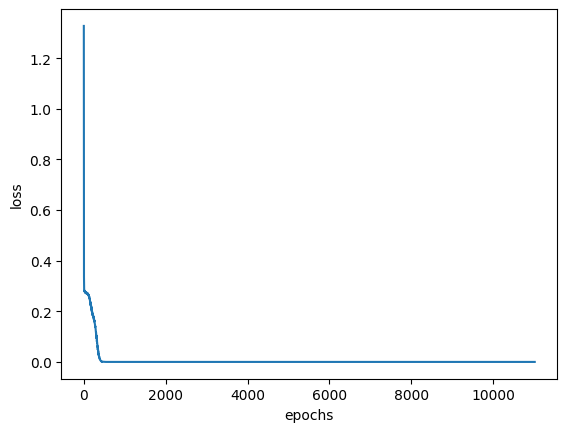

In [27]:
import matplotlib.pyplot as plt
plt.plot(losslist)
plt.xlabel('epochs')
plt.ylabel('loss')